# SARIMA- Seasonal AutoRegressive integrated moving Average

Where arim accepts parameters(p,d,q) , SARIMA accepts additional parameter
(P,D,Q)m that specifically describes the seasonal component of the model

P,D,Q represents the seasonal regression, differencing and moving average
coefficients, and m represents the number of data points(rows) in each 
seasonal cycle

The statstmodel implementation of SARIMA is called SARIMAX. The "X" added to the name
means that the function also supports exogenous regressor variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## loading libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

In [6]:
df = pd.read_csv('../Data/co2_mm_mlo.csv')

In [7]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


Here date is not given so we will create datetime index using year and month column

In [8]:
df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [9]:
## another way to create the data through dictionary is
#dict(year=df['year'],month=df['month'],day=1)

In [10]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [12]:
df = df.set_index('date')

In [13]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [14]:
df.index.freq ='MS'

In [15]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


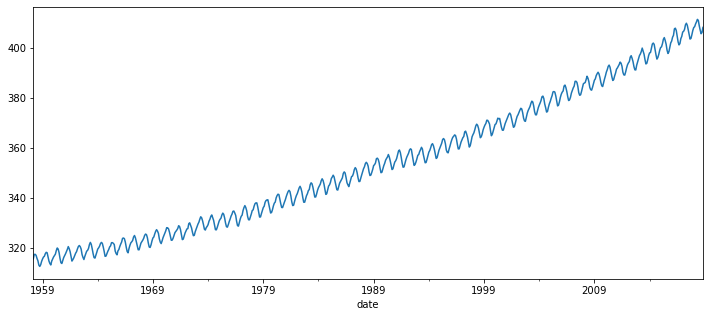

In [16]:
df['interpolated'].plot(figsize=(12,5))

here we can see with upward trend there is some seasonality. So running ets decompostion


In [17]:
result = seasonal_decompose(df['interpolated'],model='add')

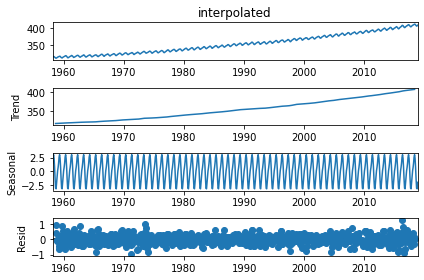

In [18]:
result.plot();

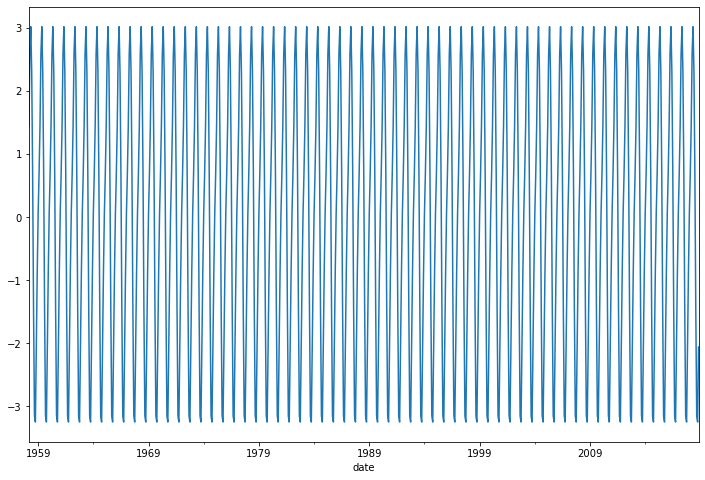

In [19]:
result.seasonal.plot(figsize=(12,8))

In [20]:
## using auto arima to decide the orders
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.262
Date:                            Fri, 07 Jan 2022   AIC                            424.525
Time:                                    14:47:41   BIC                            452.066
Sample:                                         0   HQIC                           435.152
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3557      0.095      3.757      0.000       0.170       0.541
ar.L2          0.0900      0.058      1.561      0.118      -0.023       0.203
ma.L1         -0.7111      0.092     -7.735      0.000      -0.891      -0.531
ar.S.L12       0.9996      0.000   2887.579      0.000       0.999       1.000
ma.S.L12      -0.8663      0.021    -40.571      0.000      -0.908      -0.824
sigma2         0.0957      0.005     20.534      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       43.79   Jarque-Bera (JB):                 4.42
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
len(df)

729

In [22]:
train = df.iloc[:717]
test = df.iloc[717:]

In [23]:
model = SARIMAX(train['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))

In [24]:
results  = model.fit()

C:\Users\Arvind\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.880
Date:                            Fri, 07 Jan 2022   AIC                            415.761
Time:                                    14:47:44   BIC                            443.203
Sample:                                03-01-1958   HQIC                           426.358
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3487      0.062      5.603      0.000       0.227       0.471
ar.L2          0.0837      0.019      4.368      0.000       0.046       0.121
ma.L1         -0.7026      0.050    -14.021      0.000      -0.801      -0.604
ar.S.L12       0.9996      0.000   2936.172      0.000       0.999       1.000
ma.S.L12      -0.8661      0.023    -38.134      0.000      -0.911      -0.822
sigma2         0.0953      0.005     20.333      0.000       0.086       0.104
===================================================================================
Ljung-Box (Q):                       44.30   Jarque-Bera (JB):                 4.71
Prob(Q):                              0.30   Prob(JB):                         0.09
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
start = len(train)

In [27]:
end = len(train) + len(test) -1

In [28]:
start

717

In [29]:
end

728

In [30]:
predictions = results.predict(start,end,typ='levels').rename('SARIMA Predictions')

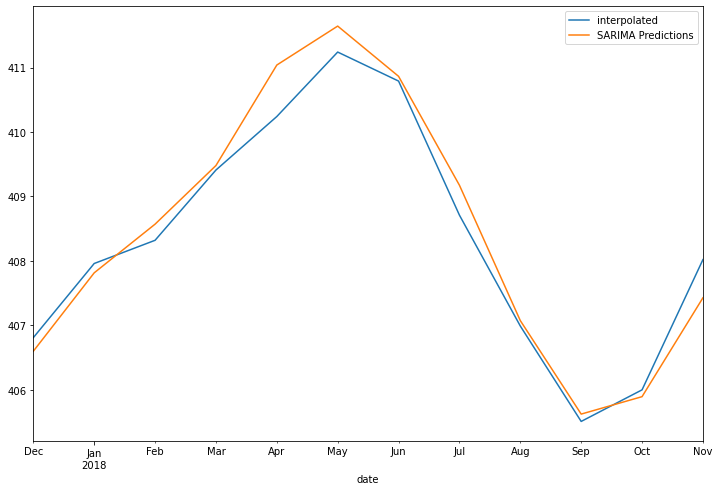

In [31]:
test['interpolated'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [32]:
from statsmodels.tools.eval_measures import rmse

In [33]:
error = rmse(test['interpolated'],predictions)

In [34]:
error

0.35776533034656666

In [35]:
test

,year,month,decimal_date,average,interpolated
date,,,,,
2017-12-01,2017,12,2017.958,406.81,406.81
2018-01-01,2018,1,2018.042,407.96,407.96
2018-02-01,2018,2,2018.125,408.32,408.32
2018-03-01,2018,3,2018.208,409.41,409.41
2018-04-01,2018,4,2018.292,410.24,410.24
2018-05-01,2018,5,2018.375,411.24,411.24
2018-06-01,2018,6,2018.458,410.79,410.79
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99


In [36]:
predictions

2017-12-01    406.599123
2018-01-01    407.815211
2018-02-01    408.570260
2018-03-01    409.479772
2018-04-01    411.038706
2018-05-01    411.642971
2018-06-01    410.863768
2018-07-01    409.174132
2018-08-01    407.074061
2018-09-01    405.623944
2018-10-01    405.894326
2018-11-01    407.427861
Freq: MS, Name: SARIMA Predictions, dtype: float64

In [37]:
test['interpolated'].mean()

408.3333333333333

In [38]:
predictions.mean()

408.4336778329983

#### retraining our data on full model and then forecasting in future.

# True forecast into unknown future

In [39]:
model = SARIMAX(df['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12)) 

In [40]:
results = model.fit()

C:\Users\Arvind\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [41]:
forecast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA FORECAST')

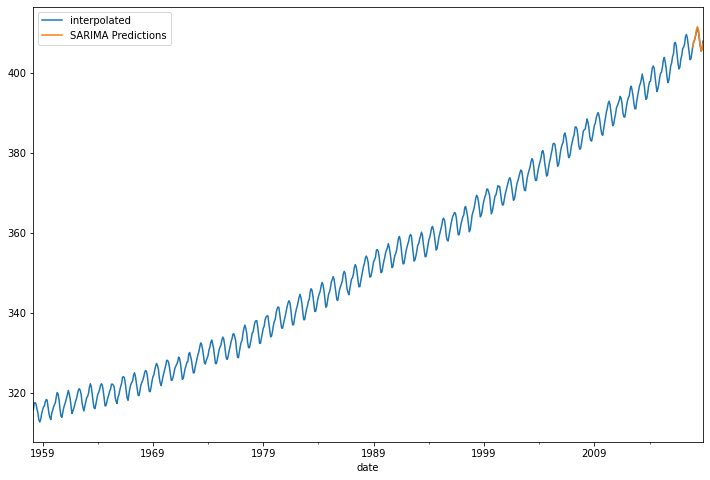

In [42]:
df['interpolated'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

### SARIMAX Models

<img 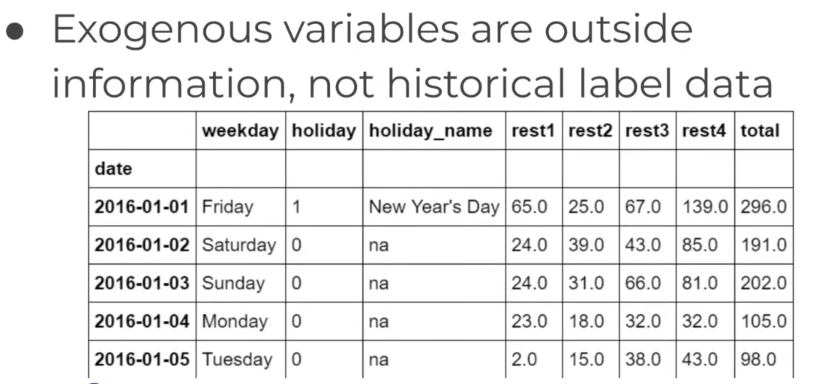

<img 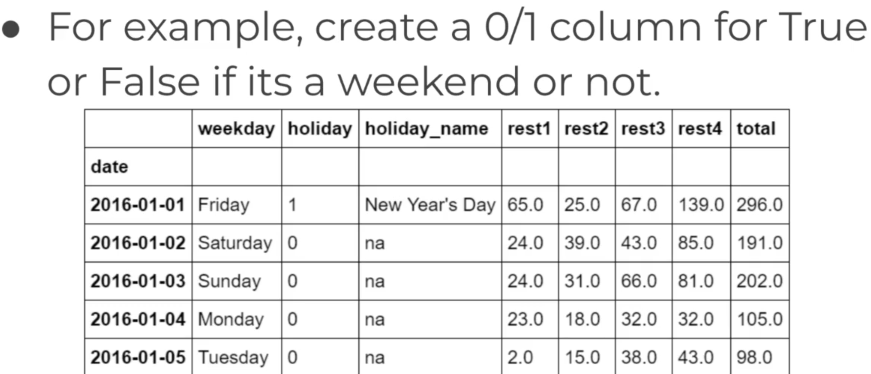

we should have some intution about what relates to the column you are trying to forecast

for statsmodel, exogenous variables should be converted to numerical values.

There are variety of ways to do this.(eg.one hot encoding, dummy variable,etc)

This usually involves just mapping values to some 0 or 1 True or False scale.

This can be done with pandas pd.get_dummies() command

SARIMAX makes it easy to add in additional columns as exogenous variables